<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Exam_2_INFO5502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:

#Step 1: Questions 



import pandas as pd
import numpy as np

titanic_df=pd.read_csv('titanic_individuals.csv')
titanic_df



,Unnamed: 0,Name,PClass,Age,Sex,Survived
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0


In [50]:
titanic_df = titanic_df.loc[:, ~titanic_df.columns.str.contains('^Unnamed')]
titanic_df

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0


In [51]:
titanic_df.isnull().sum()
titanic_df = titanic_df.dropna()

In [52]:
titanic_df["SexCode"]=titanic_df["Sex"].replace({"female": 1, "male": 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
titanic_df = titanic_df[['PClass','Age','Survived','Sex','SexCode']].copy()

In [54]:
titanic_df

,PClass,Age,Survived,Sex,SexCode
0,1st,29.00,1,female,1
1,1st,2.00,0,female,1
2,1st,30.00,0,male,0
3,1st,25.00,0,female,1
4,1st,0.92,1,male,0
...,...,...,...,...,...
1308,3rd,27.00,0,male,0
1309,3rd,26.00,0,male,0
1310,3rd,22.00,0,male,0
1311,3rd,24.00,0,male,0


In [55]:
#Step 2: Questions

df_children = titanic_df[(titanic_df['Age'] < 21)]
df_children.head()

,PClass,Age,Survived,Sex,SexCode
1,1st,2.00,0,female,1
4,1st,0.92,1,male,0
11,1st,19.00,1,female,1
23,1st,19.00,1,female,1
49,1st,14.00,1,female,1


In [56]:
df_adult = titanic_df[(titanic_df['Age'] > 21)]
df_adult.head()

,PClass,Age,Survived,Sex,SexCode
0,1st,29.0,1,female,1
2,1st,30.0,0,male,0
3,1st,25.0,0,female,1
5,1st,47.0,1,male,0
6,1st,63.0,1,female,1


In [57]:
survivors_data_children = df_children[df_children.Survived==1]
non_survivors_data_children = df_children[df_children.Survived==0]

survivors_data_adult = df_adult[df_adult.Survived==1]
non_survivors_data_adult = df_adult[df_adult.Survived==0]

In [58]:
def calculate_percentage(val, total, format_percent = False):
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

survivors_class_children = survivors_data_children.groupby(['PClass']).size().values
non_survivors_class_children = non_survivors_data_children.groupby(['PClass']).size().values


survivors_class_adult = survivors_data_adult.groupby(['PClass']).size().values
non_survivors_class_adult = non_survivors_data_adult.groupby(['PClass']).size().values





In [62]:
totals = survivors_class_children + non_survivors_class_children

totals_adult = survivors_class_adult + non_survivors_class_adult


survived_child_percentages = calculate_percentage(survivors_class_children, totals)*100 
nonsurvived_child_percentages = calculate_percentage(non_survivors_class_children, totals)*100 

survived_adult_percentages = calculate_percentage(survivors_class_adult, totals_adult)*100 
nonsurvived_adult_percentages = calculate_percentage(non_survivors_class_adult, totals_adult)*100 



Text(0.5, 1.0, '% of survivors by class children')

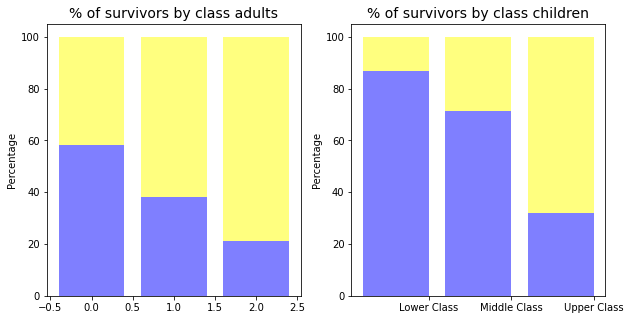

In [64]:
class_categories = ['Lower Class', 'Middle Class', 'Upper Class']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.bar(range(len(survived_adult_percentages)), survived_adult_percentages, alpha=0.5, color='blue')
ax1.bar(range(len(nonsurvived_adult_percentages)), nonsurvived_adult_percentages, bottom=survived_adult_percentages, alpha=0.5, color='yellow')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax1.set_ylabel("Percentage")
ax1.set_xlabel("")
ax1.set_title("% of survivors by class adults",fontsize=14)

ax2.bar(range(len(survived_child_percentages)), survived_child_percentages, alpha=0.5, color='blue')
ax2.bar(range(len(nonsurvived_child_percentages)), nonsurvived_child_percentages, bottom=survived_child_percentages, alpha=0.5, color='yellow')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class children",fontsize=14)